# SERA Monthly Prediction whole year

## Imports and Functions

In [1]:
import tensorflow as tf
import os
import numpy as np
import random
import keras
SEED = 42

def set_seeds(seed=SEED):
    os.environ['PYTHONHASHSEED'] = str(seed)
    random.seed(seed)
    tf.random.set_seed(seed)
    np.random.seed(seed)
    keras.utils.set_random_seed(seed)

def set_global_determinism(seed=SEED):
    set_seeds(seed=seed)

    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'
    
    tf.config.threading.set_inter_op_parallelism_threads(1)
    tf.config.threading.set_intra_op_parallelism_threads(1)

# Call the above function with seed value
set_global_determinism(seed=SEED)

In [13]:
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, LSTM, Dense, Dropout, GRU, Conv1D, Flatten, Reshape
import sys
import xgboost as xgb


In [3]:
# Add the folder to the Python path

os.chdir("../")
# change working directory to project's root path
print(os.getcwd())

FIRST_YEAR= 1972
FREQUENCY= "monthly"

c:\Users\marti\Desktop\data\hw_extra


In [11]:
folder_path = os.path.abspath("functions/") #INPUT_PATH)#'path_to_your_folder')  # Replace with the actual folder path
sys.path.insert(0, folder_path)

from Predictions import (
    PredictionExperiment,
    PredictionModel,
    SERA,
    sera_objective,
    piecewise_linear_phi_np
)

c:\Users\marti\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [4]:
indices_of_interest = ["HWN", "HWF", "HWD", "HWM", "HWA"]
bounds = (-1.1692892810242344, -0.30647585455315646, 4.561547586528888, 6.499969486244418)

## California

In [5]:
region="california"
metadata_path = f"data/climate_features/{region}/metadata.csv"
metadata = pd.read_csv(metadata_path)
metadata.reset_index(inplace=True, drop=True)
display(metadata)

id                       filename  season   
0   6e47cb06   predictor_6e47cb06_1.parquet       1  \
1   6e47cb06   predictor_6e47cb06_2.parquet       2   
2   6e47cb06   predictor_6e47cb06_3.parquet       3   
3   6e47cb06   predictor_6e47cb06_4.parquet       4   
4   6e47cb06   predictor_6e47cb06_5.parquet       5   
5   6e47cb06   predictor_6e47cb06_6.parquet       6   
6   6e47cb06   predictor_6e47cb06_7.parquet       7   
7   6e47cb06   predictor_6e47cb06_8.parquet       8   
8   6e47cb06   predictor_6e47cb06_9.parquet       9   
9   6e47cb06  predictor_6e47cb06_10.parquet      10   
10  6e47cb06  predictor_6e47cb06_11.parquet      11   
11  6e47cb06  predictor_6e47cb06_12.parquet      12   
12  5cb3fa02   predictor_5cb3fa02_1.parquet       1   
13  5cb3fa02   predictor_5cb3fa02_2.parquet       2   
14  5cb3fa02   predictor_5cb3fa02_3.parquet       3   
15  5cb3fa02   predictor_5cb3fa02_4.parquet       4   
16  5cb3fa02   predictor_5cb3fa02_5.parquet       5   
17  5cb3fa02   predictor_5cb3fa02_6.parquet       6   
18  5cb3fa02   predictor_5cb3fa02_7.parquet       7   
19  5cb3fa02   predictor_5cb3fa02_8.parquet       8   
20  5cb3fa02   predictor_5cb3fa02_9.parquet       9   
21  5cb3fa02  predictor_5cb3fa02_10.parquet      10   
22  5cb3fa02  predictor_5cb3fa02_11.parquet      11   
23  5cb3fa02  predictor_5cb3fa02_12.parquet      12   

                                              indices  
0   df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...  
1   df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...  
2   df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...  
3   df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...  
4   df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...  
5   df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...  
6   df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...  
7   df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...  
8   df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...  
9   df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...  
10  df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...  
11  df9a31c5-20a07cea-cfb03125-9169e0dc-0b0bffae-b...  
12  fde0e327-340e2882-f27c56aa-5b9237bf-46fa0cb8-6...  
13  fde0e327-340e2882-f27c56aa-5b9237bf-46fa0cb8-6...  
14  fde0e327-340e2882-f27c56aa-5b9237bf-46fa0cb8-6...  
15  fde0e327-340e2882-f27c56aa-5b9237bf-46fa0cb8-6...  
16  fde0e327-340e2882-f27c56aa-5b9237bf-46fa0cb8-6...  
17  fde0e327-340e2882-f27c56aa-5b9237bf-46fa0cb8-6...  
18  fde0e327-340e2882-f27c56aa-5b9237bf-46fa0cb8-6...  
19  fde0e327-340e2882-f27c56aa-5b9237bf-46fa0cb8-6...  
20  fde0e327-340e2882-f27c56aa-5b9237bf-46fa0cb8-6...  
21  fde0e327-340e2882-f27c56aa-5b9237bf-46fa0cb8-6...  
22  fde0e327-340e2882-f27c56aa-5b9237bf-46fa0cb8-6...  
23  fde0e327-340e2882-f27c56aa-5b9237bf-46fa0cb8-6...

In [6]:
results = pd.read_csv(f"data/sera_results/{region}_results/results.csv")
ids_results = results["id_data"].unique()
id_experiments = metadata["id"].unique()
ids_to_execute = [id for id in id_experiments if id not in ids_results]
print(len(ids_to_execute))

0


In [7]:
k=0
for id in ids_to_execute:
    k+=1
    print("Executing",id, "iter", k)
    data = {1: pd.read_parquet(f"data/climate_features/{region}/predictor_{id}_year.parquet")}
    rnn16_model = Sequential([
    SimpleRNN(16, activation="tanh", input_shape=(1, len(data[1].columns) - len(indices_of_interest))),
    Dropout(0.1),  # Regularization
    Dense(8, activation="relu"),
    Dense(len(indices_of_interest))  # Predict 5 indices
    ])
    lstm16_model = Sequential([
    LSTM(16, activation="tanh", input_shape=(1, len(data[1].columns) - len(indices_of_interest))),
    Dropout(0.1),  # Regularization
    Dense(8, activation="relu"),
    Dense(len(indices_of_interest))  # Predict 5 indices
    ])
    cnn_rnn_model = Sequential([
        Conv1D(16, kernel_size=1, activation="relu", input_shape=(1, len(data[1].columns) - len(indices_of_interest))),
        Reshape((1, 16)),  # Back to time dimension
        SimpleRNN(8, activation="tanh"),
        Dropout(0.1),
        Dense(len(indices_of_interest))
    ])
    lp_model = Sequential([
        Flatten(input_shape=(1, len(data[1].columns) - len(indices_of_interest))),
        Dense(16, activation="relu"),
        Dropout(0.1),
        Dense(8, activation="relu"),
        Dense(len(indices_of_interest))
    ])
    # assert len(regressors) == len(name_regressors)
    regressors =  [rnn16_model, lstm16_model, cnn_rnn_model, lp_model]
    name_regressors =  ["RNN16", "LSTM16", "CNNRNN16", "MLP16"]
    assert len(regressors) == len(name_regressors)
    experiment_1 = PredictionExperiment(data, indices_of_interest, regressors, name_regressors, 60, id, loss_fn=SERA(bounds=bounds,T=100))
    experiment_1.execute_experiment()
    experiment_1.get_metrics("r2", "prediction", show=False)
    experiment_1.get_metrics("mape", "prediction", show=False)
    experiment_1.get_metrics("mae", stage="prediction", show=False)
    experiment_1.get_metrics("r2", stage="training", show=False)
    experiment_1.get_metrics("mape", stage="training", show=False)
    experiment_1.get_metrics("mae", stage="training", show=False)
    experiment_1.get_metrics("r2", stage="CV", show=False)
    experiment_1.get_metrics("mape", stage="CV", show=False)
    experiment_1.get_metrics("mae", stage="CV", show=False)
    experiment_1.get_metrics("r2", stage="TSCV", show=False)
    experiment_1.get_metrics("mape", stage="TSCV", show=False)
    experiment_1.get_metrics("mae", stage="TSCV", show=False)
    experiment_1.get_metrics("sera", stage="prediction", show=False)
    experiment_1.get_metrics("sera", stage="training", show=False)
    experiment_1.get_metrics("sera", stage="CV", show=False)
    experiment_1.get_metrics("sera", stage="TSCV", show=False)

    #experiment_1.top_results("r2", 5, stage="prediction", top_data_path=f"data/results/{FREQUENCY}/top_results.csv")
    #experiment_1.top_results("cv_r2", 5, stage="CV", top_data_path=f"data/results/{FREQUENCY}/top_results.csv")
    experiment_1.save_results(f"data/sera_results_year/{region}_results/results.csv")

## Chile

In [8]:
region="chile"
metadata = pd.read_csv(f"data/climate_features/{region}/metadata.csv")
metadata.reset_index(inplace=True, drop=True)
display(metadata)

id                       filename  season   
0    978f49d7   predictor_978f49d7_1.parquet       1  \
1    978f49d7   predictor_978f49d7_2.parquet       2   
2    978f49d7   predictor_978f49d7_3.parquet       3   
3    978f49d7   predictor_978f49d7_4.parquet       4   
4    978f49d7   predictor_978f49d7_5.parquet       5   
..        ...                            ...     ...   
247  458d357c   predictor_458d357c_8.parquet       8   
248  458d357c   predictor_458d357c_9.parquet       9   
249  458d357c  predictor_458d357c_10.parquet      10   
250  458d357c  predictor_458d357c_11.parquet      11   
251  458d357c  predictor_458d357c_12.parquet      12   

                                               indices  
0    fde0e327-340e2882-43701738-e306f58b-e601b072-e...  
1    fde0e327-340e2882-43701738-e306f58b-e601b072-e...  
2    fde0e327-340e2882-43701738-e306f58b-e601b072-e...  
3    fde0e327-340e2882-43701738-e306f58b-e601b072-e...  
4    fde0e327-340e2882-43701738-e306f58b-e601b072-e...  
..                                                 ...  
247  32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...  
248  32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...  
249  32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...  
250  32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...  
251  32f131d2-69ffcfa8-4af95abb-4a86cb22-52eda853-3...  

[252 rows x 4 columns]

In [9]:
results = pd.read_csv(f"data/climate_results/{region}_results/results.csv")
ids_results = results["id_data"].unique()
id_experiments = metadata["id"].unique()
ids_to_execute = [id for id in id_experiments if id not in ids_results]
print(len(ids_to_execute))


0


In [ ]:
k=0
for id in id_experiments:
    k+=1
    print("Executing",id, "iter", k)
    data = {1: pd.read_parquet(f"data/climate_features/{region}/predictor_{id}_year.parquet")}
    rnn16_model = Sequential([
    SimpleRNN(16, activation="tanh", input_shape=(1, len(data[1].columns) - len(indices_of_interest))),
    Dropout(0.1),  # Regularization
    Dense(8, activation="relu"),
    Dense(len(indices_of_interest))  # Predict 5 indices
    ])
    lstm16_model = Sequential([
    LSTM(16, activation="tanh", input_shape=(1, len(data[1].columns) - len(indices_of_interest))),
    Dropout(0.1),  # Regularization
    Dense(8, activation="relu"),
    Dense(len(indices_of_interest))  # Predict 5 indices
    ])
    cnn_rnn_model = Sequential([
        Conv1D(16, kernel_size=1, activation="relu", input_shape=(1, len(data[1].columns) - len(indices_of_interest))),
        Reshape((1, 16)),  # Back to time dimension
        SimpleRNN(8, activation="tanh"),
        Dropout(0.1),
        Dense(len(indices_of_interest))
    ])
    lp_model = Sequential([
        Flatten(input_shape=(1, len(data[1].columns) - len(indices_of_interest))),
        Dense(16, activation="relu"),
        Dropout(0.1),
        Dense(8, activation="relu"),
        Dense(len(indices_of_interest))
    ])
    # assert len(regressors) == len(name_regressors)
    regressors =  [rnn16_model, lstm16_model, cnn_rnn_model, lp_model]
    name_regressors =  ["RNN16", "LSTM16", "CNNRNN16", "MLP16"]
    assert len(regressors) == len(name_regressors)
    experiment_1 = PredictionExperiment(data, indices_of_interest, regressors, name_regressors, 60, id, loss_fn=SERA(bounds=bounds,T=100))
    experiment_1.execute_experiment()
    experiment_1.get_metrics("r2", "prediction", show=False)
    experiment_1.get_metrics("mape", "prediction", show=False)
    experiment_1.get_metrics("mae", stage="prediction", show=False)
    experiment_1.get_metrics("r2", stage="training", show=False)
    experiment_1.get_metrics("mape", stage="training", show=False)
    experiment_1.get_metrics("mae", stage="training", show=False)
    experiment_1.get_metrics("r2", stage="CV", show=False)
    experiment_1.get_metrics("mape", stage="CV", show=False)
    experiment_1.get_metrics("mae", stage="CV", show=False)
    experiment_1.get_metrics("r2", stage="TSCV", show=False)
    experiment_1.get_metrics("mape", stage="TSCV", show=False)
    experiment_1.get_metrics("mae", stage="TSCV", show=False)
    experiment_1.get_metrics("sera", stage="prediction", show=False)
    experiment_1.get_metrics("sera", stage="training", show=False)
    experiment_1.get_metrics("sera", stage="CV", show=False)
    experiment_1.get_metrics("sera", stage="TSCV", show=False)

    #experiment_1.top_results("r2", 5, stage="prediction", top_data_path=f"data/results/{FREQUENCY}/top_results.csv")
    #experiment_1.top_results("cv_r2", 5, stage="CV", top_data_path=f"data/results/{FREQUENCY}/top_results.csv")
    experiment_1.save_results(f"data/sera_results_year/{region}_results/results.csv")

Executing 978f49d7 iter 1
Train predicting  0 RNN16
Epoch 1/200
69/69 [==============================] - 13s 44ms/step - loss: 19.0550 - val_loss: 25.4534
Epoch 2/200
69/69 [==============================] - 0s 3ms/step - loss: 17.5619 - val_loss: 23.5846
Epoch 3/200
69/69 [==============================] - 0s 3ms/step - loss: 16.4949 - val_loss: 22.0016
Epoch 4/200
69/69 [==============================] - 0s 3ms/step - loss: 16.0654 - val_loss: 20.8384
Epoch 5/200
69/69 [==============================] - 0s 3ms/step - loss: 15.4029 - val_loss: 19.8389
Epoch 6/200
69/69 [==============================] - 0s 3ms/step - loss: 14.6308 - val_loss: 18.8708
Epoch 7/200
69/69 [==============================] - 0s 4ms/step - loss: 14.3784 - val_loss: 18.2170
Epoch 8/200
69/69 [==============================] - 0s 3ms/step - loss: 14.3668 - val_loss: 17.6655
Epoch 9/200
69/69 [==============================] - 0s 4ms/step - loss: 13.4458 - val_loss: 17.2979
Epoch 10/200
69/69 [=================

In [12]:

from sklearn.base import BaseEstimator, RegressorMixin

class XGBCustomObjective(BaseEstimator, RegressorMixin):
    """
    Wrapper class to make XGBoost with custom objectives compatible with sklearn.
    This is needed for MultiOutputRegressor.
    """
    def __init__(self, objective_func=None, random_state=42, n_estimators=15, learning_rate=0.1, max_depth=6, subsample=0.8, colsample_bytree=0.8, **kwargs):
        self.objective_func = objective_func
        self.random_state = random_state
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.subsample = subsample
        self.colsample_bytree = colsample_bytree
        self.kwargs = kwargs
        self.model = None
        
    def fit(self, X, y):
        """Fit the model with custom objective."""
        # Create DMatrix
        dtrain = xgb.DMatrix(X, label=y)
        
        # Set up parameters using your specified values
        params = {
            'max_depth': self.max_depth,
            'eta': self.learning_rate,  # learning_rate
            'subsample': self.subsample,
            'colsample_bytree': self.colsample_bytree,
            'seed': self.random_state,  # random_state
            'disable_default_eval_metric': 1 if self.objective_func else 0
        }
        params.update(self.kwargs)
        
        if self.objective_func:
            # Train with custom objective
            self.model = xgb.train(
                params=params,
                dtrain=dtrain,
                num_boost_round=self.n_estimators,
                obj=self.objective_func,
                verbose_eval=False
            )
        else:
            # Train with standard objective
            params['objective'] = 'reg:squarederror'
            del params['disable_default_eval_metric']
            self.model = xgb.train(
                params=params,
                dtrain=dtrain,
                num_boost_round=self.n_estimators,
                verbose_eval=False
            )
        
        return self
    
    def predict(self, X):
        """Make predictions."""
        dtest = xgb.DMatrix(X)
        return self.model.predict(dtest)
    
    def get_params(self, deep=True):
        """Get parameters for this estimator (required for sklearn compatibility)."""
        params = {
            'objective_func': self.objective_func,
            'random_state': self.random_state,
            'n_estimators': self.n_estimators,
            'learning_rate': self.learning_rate,
            'max_depth': self.max_depth,
            'subsample': self.subsample,
            'colsample_bytree': self.colsample_bytree
        }
        params.update(self.kwargs)
        return params
    
    def set_params(self, **params):
        """Set parameters for this estimator (required for sklearn compatibility)."""
        for key, value in params.items():
            if hasattr(self, key):
                setattr(self, key, value)
            else:
                self.kwargs[key] = value
        return self

In [ ]:
bounds = (-1.1692892810242344, -0.30647585455315646, 3.0, 6.499969486244418)
i_w = 0.2

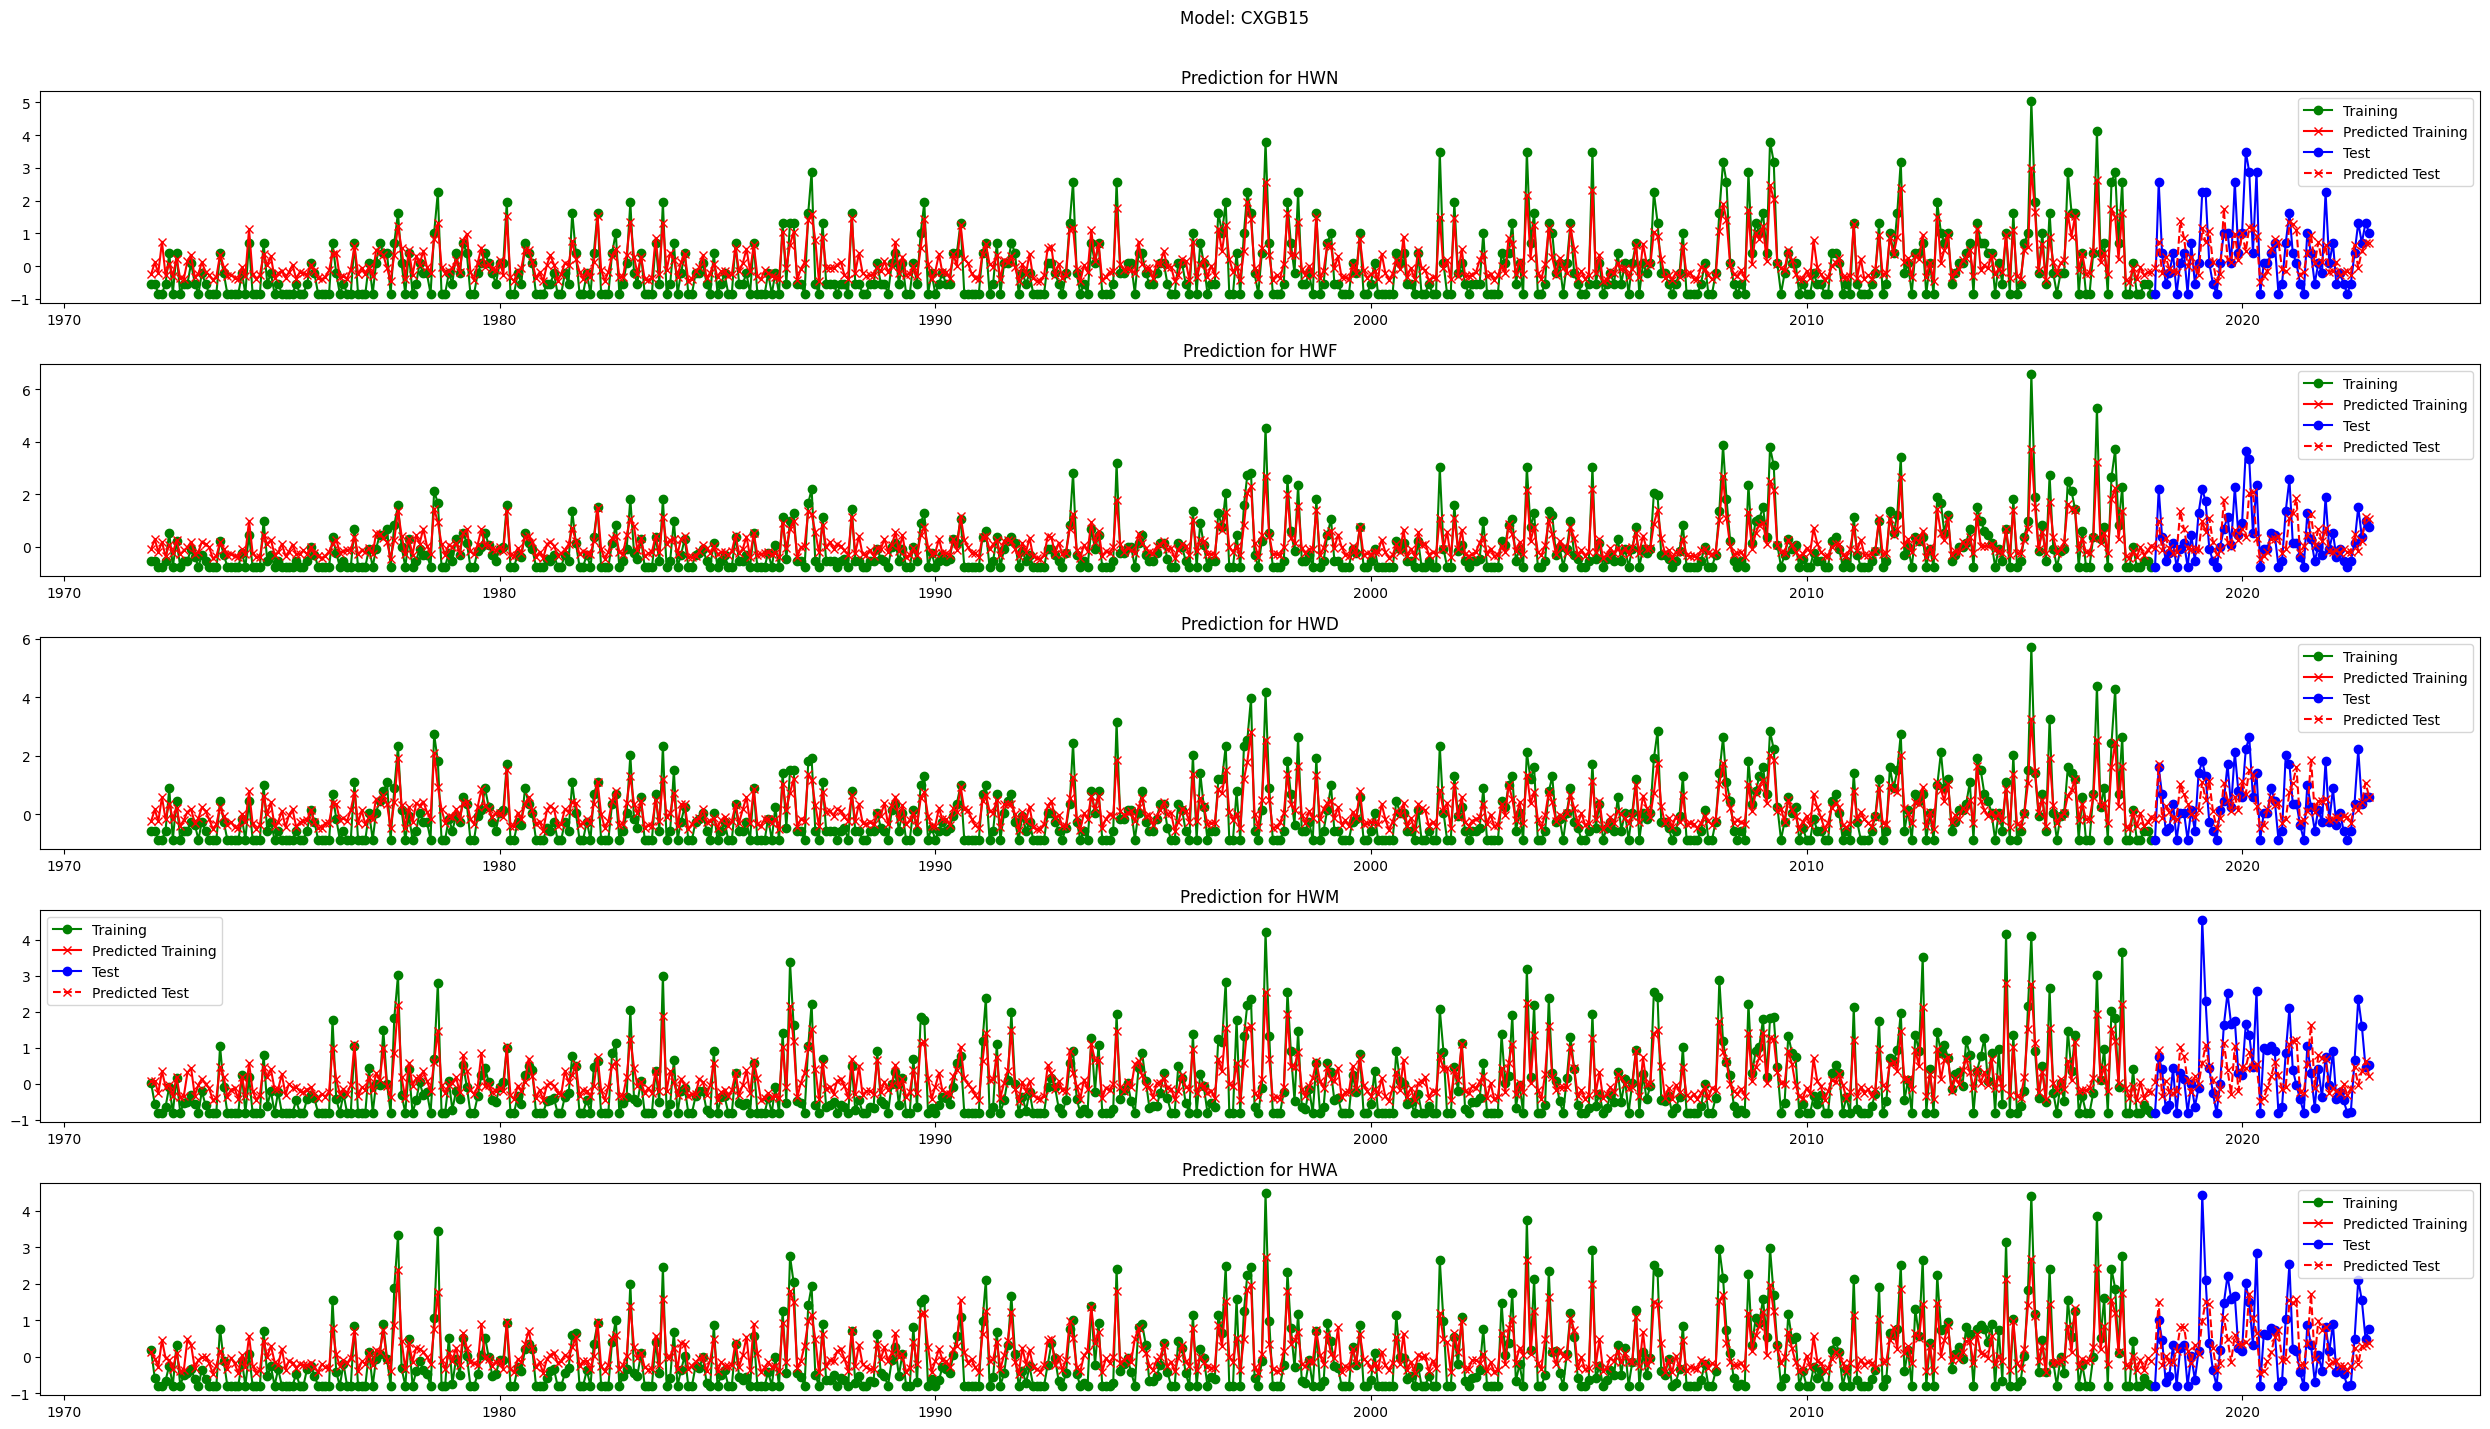

In [16]:
id = "ecf2577f"
season = 1
data = pd.read_parquet(f"data/climate_features/{region}/predictor_{id}_year_v2.parquet")
# data = data.drop(columns=["HWF", "HWM", "HWD", "HWA"])
model = XGBCustomObjective(
    objective_func=sera_objective(piecewise_linear_phi_np(bounds, initial_weight=i_w)),
    random_state=42,
    n_estimators=15,
    learning_rate=0.1
)

pred = PredictionModel(data, season, indices_of_interest, model, name_regressor="CXGB15", loss_fn=SERA(bounds=bounds, initial_weight=i_w))
y_train, y_pred_train = pred.train(60)
y_test, y_pred = pred.predict(60)
dates = data.index
pred.plot_predictions(dates, 60, y_train, y_pred_train, y_test, y_pred)

In [17]:
pred.get_metric("mae")

['CXGB15',
 1,
 '-1.1692892810242344|-0.30647585455315646|3.0|6.499969486244418',
 0.3,
 'mae',
 'prediction',
 0.7103104664811836,
 0.7646511856180022,
 0.7038568281043603,
 0.7492379402744743,
 0.7793584586900921,
 0.7414829758336225]

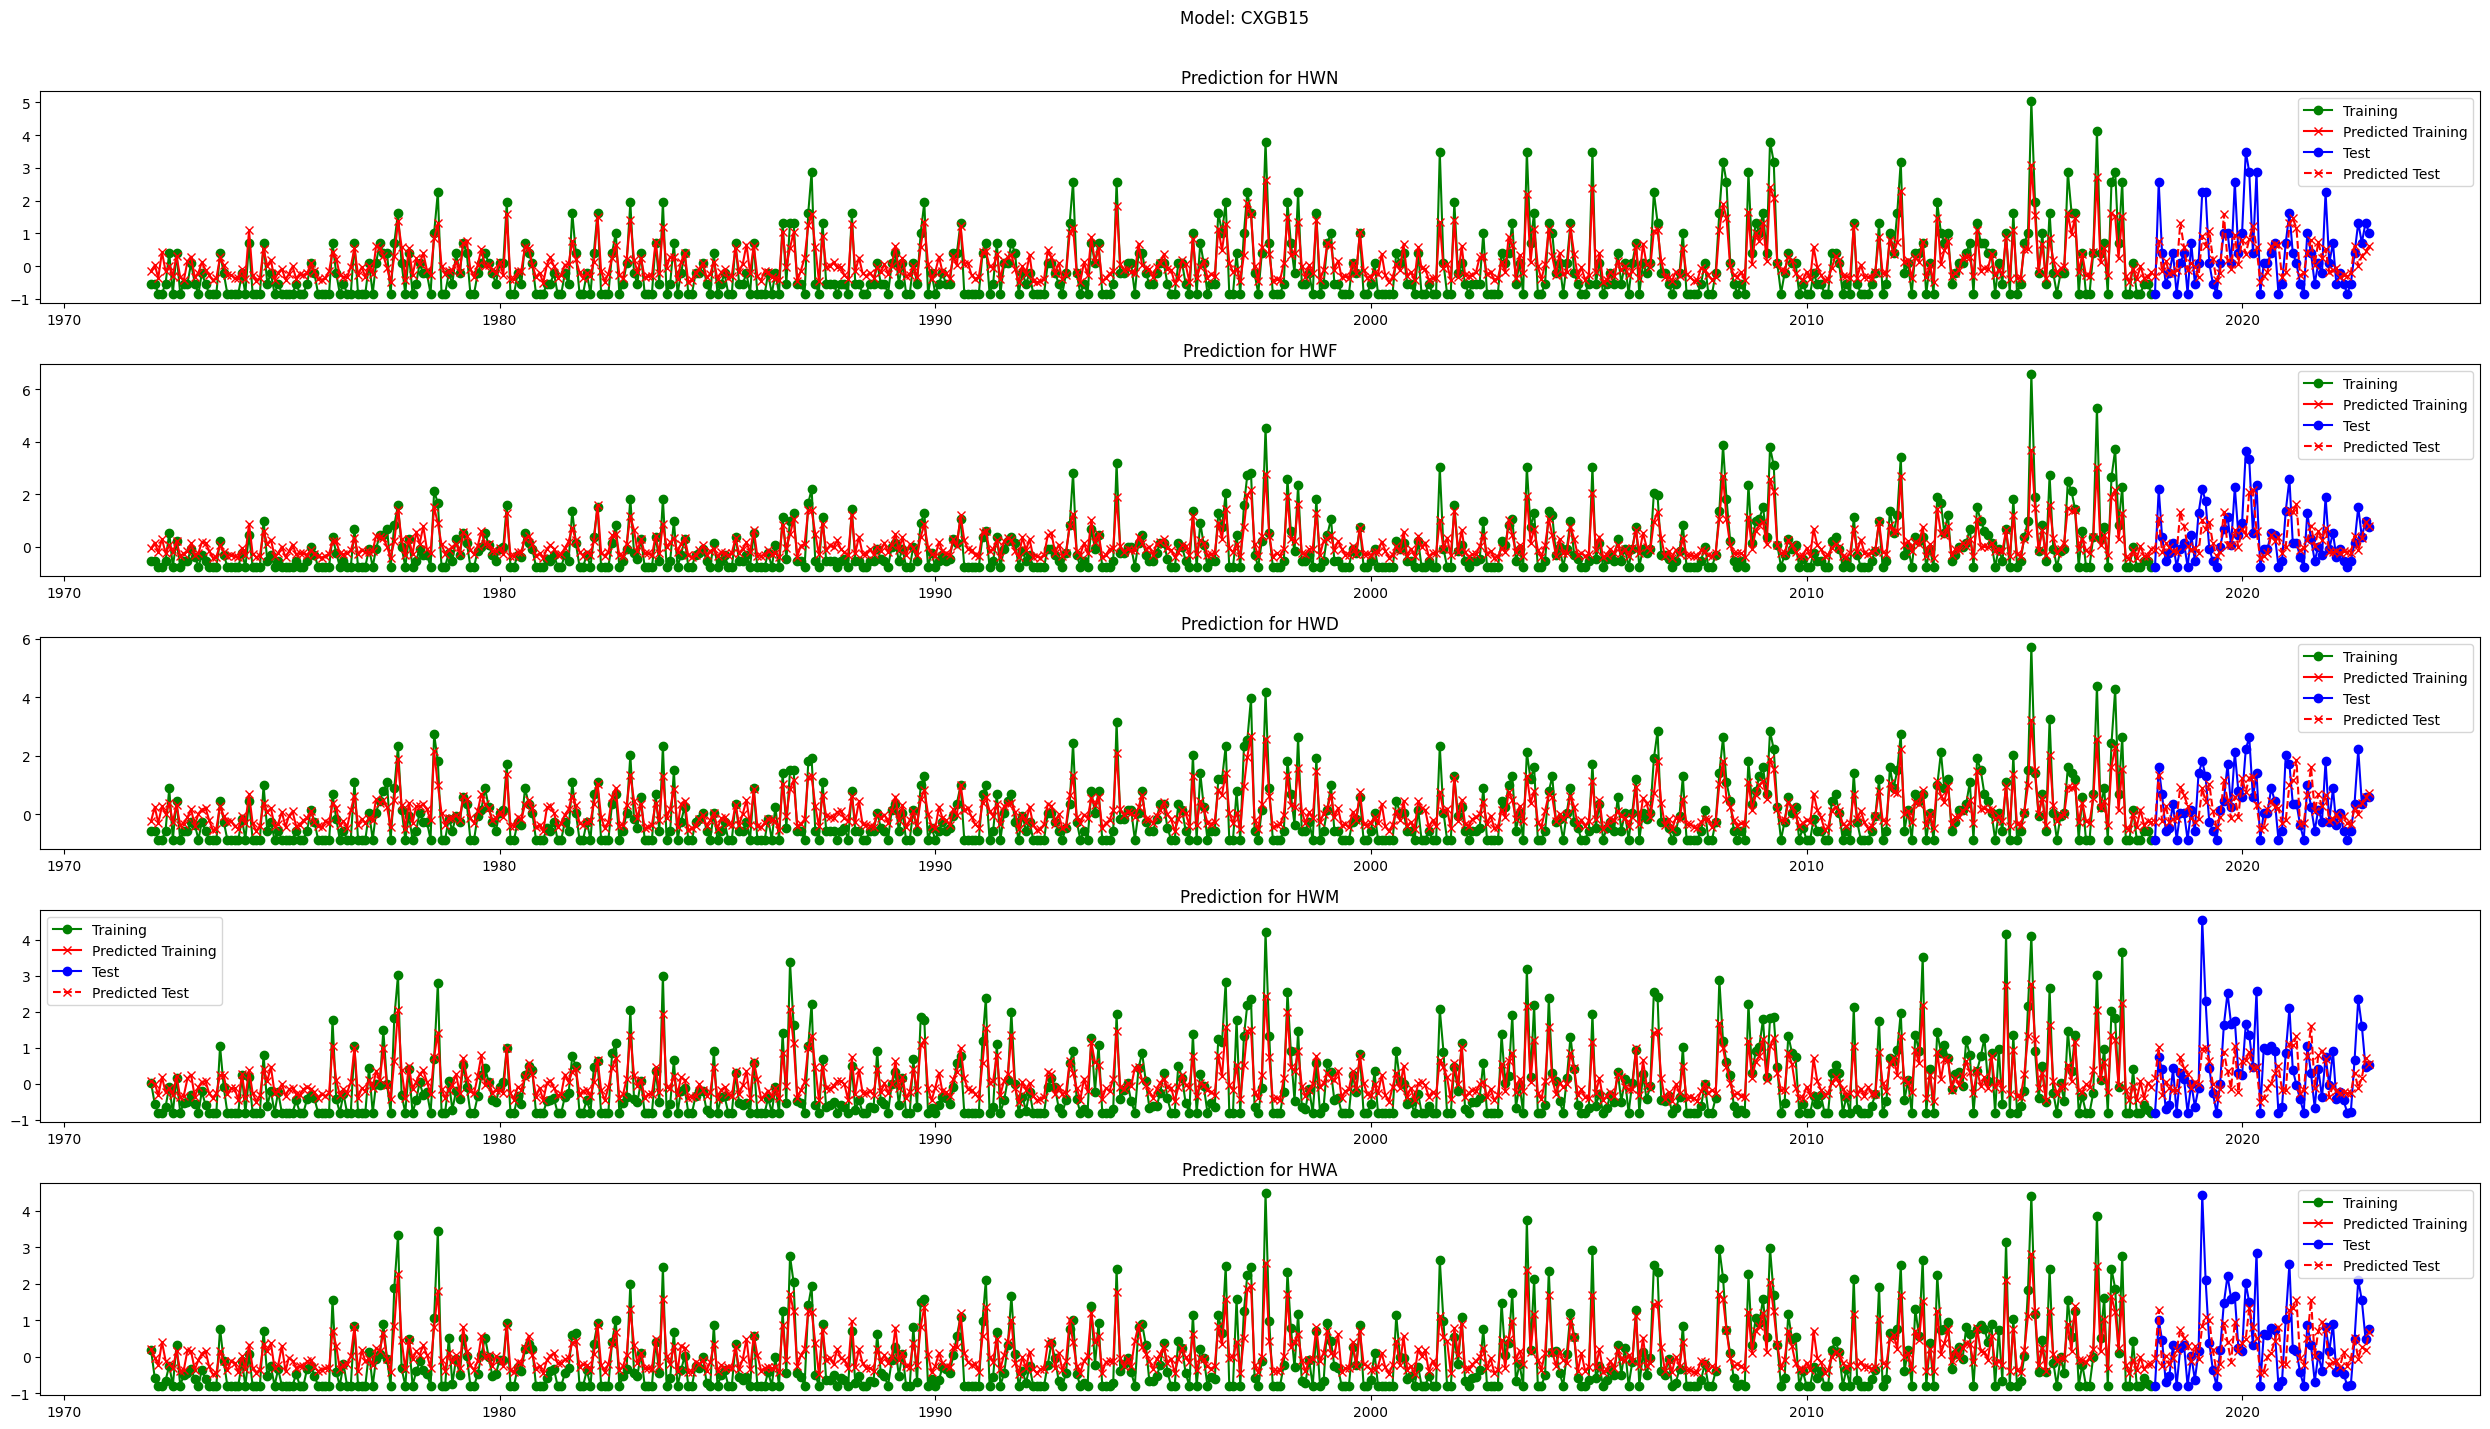

In [20]:
bounds = (-1.1692892810242344, -0.30647585455315646, 3.0, 6.499969486244418)
i_w = 0.4
id = "ecf2577f"
season = 1
data = pd.read_parquet(f"data/climate_features/{region}/predictor_{id}_year_v2.parquet")
# data = data.drop(columns=["HWF", "HWM", "HWD", "HWA"])
model = XGBCustomObjective(
    objective_func=sera_objective(piecewise_linear_phi_np(bounds, initial_weight=i_w)),
    random_state=42,
    n_estimators=15,
    learning_rate=0.1
)

pred = PredictionModel(data, season, indices_of_interest, model, name_regressor="CXGB15", loss_fn=SERA(bounds=bounds, initial_weight=i_w))
y_train, y_pred_train = pred.train(60)
y_test, y_pred = pred.predict(60)
dates = data.index
pred.plot_predictions(dates, 60, y_train, y_pred_train, y_test, y_pred)

In [21]:
pred.get_metric("mae")

['CXGB15',
 1,
 '-1.1692892810242344|-0.30647585455315646|3.0|6.499969486244418',
 0.4,
 'mae',
 'prediction',
 0.7288723985679761,
 0.7219608195796857,
 0.6997492617744284,
 0.7534441973913305,
 0.7711787253004695,
 0.7350410805227781]

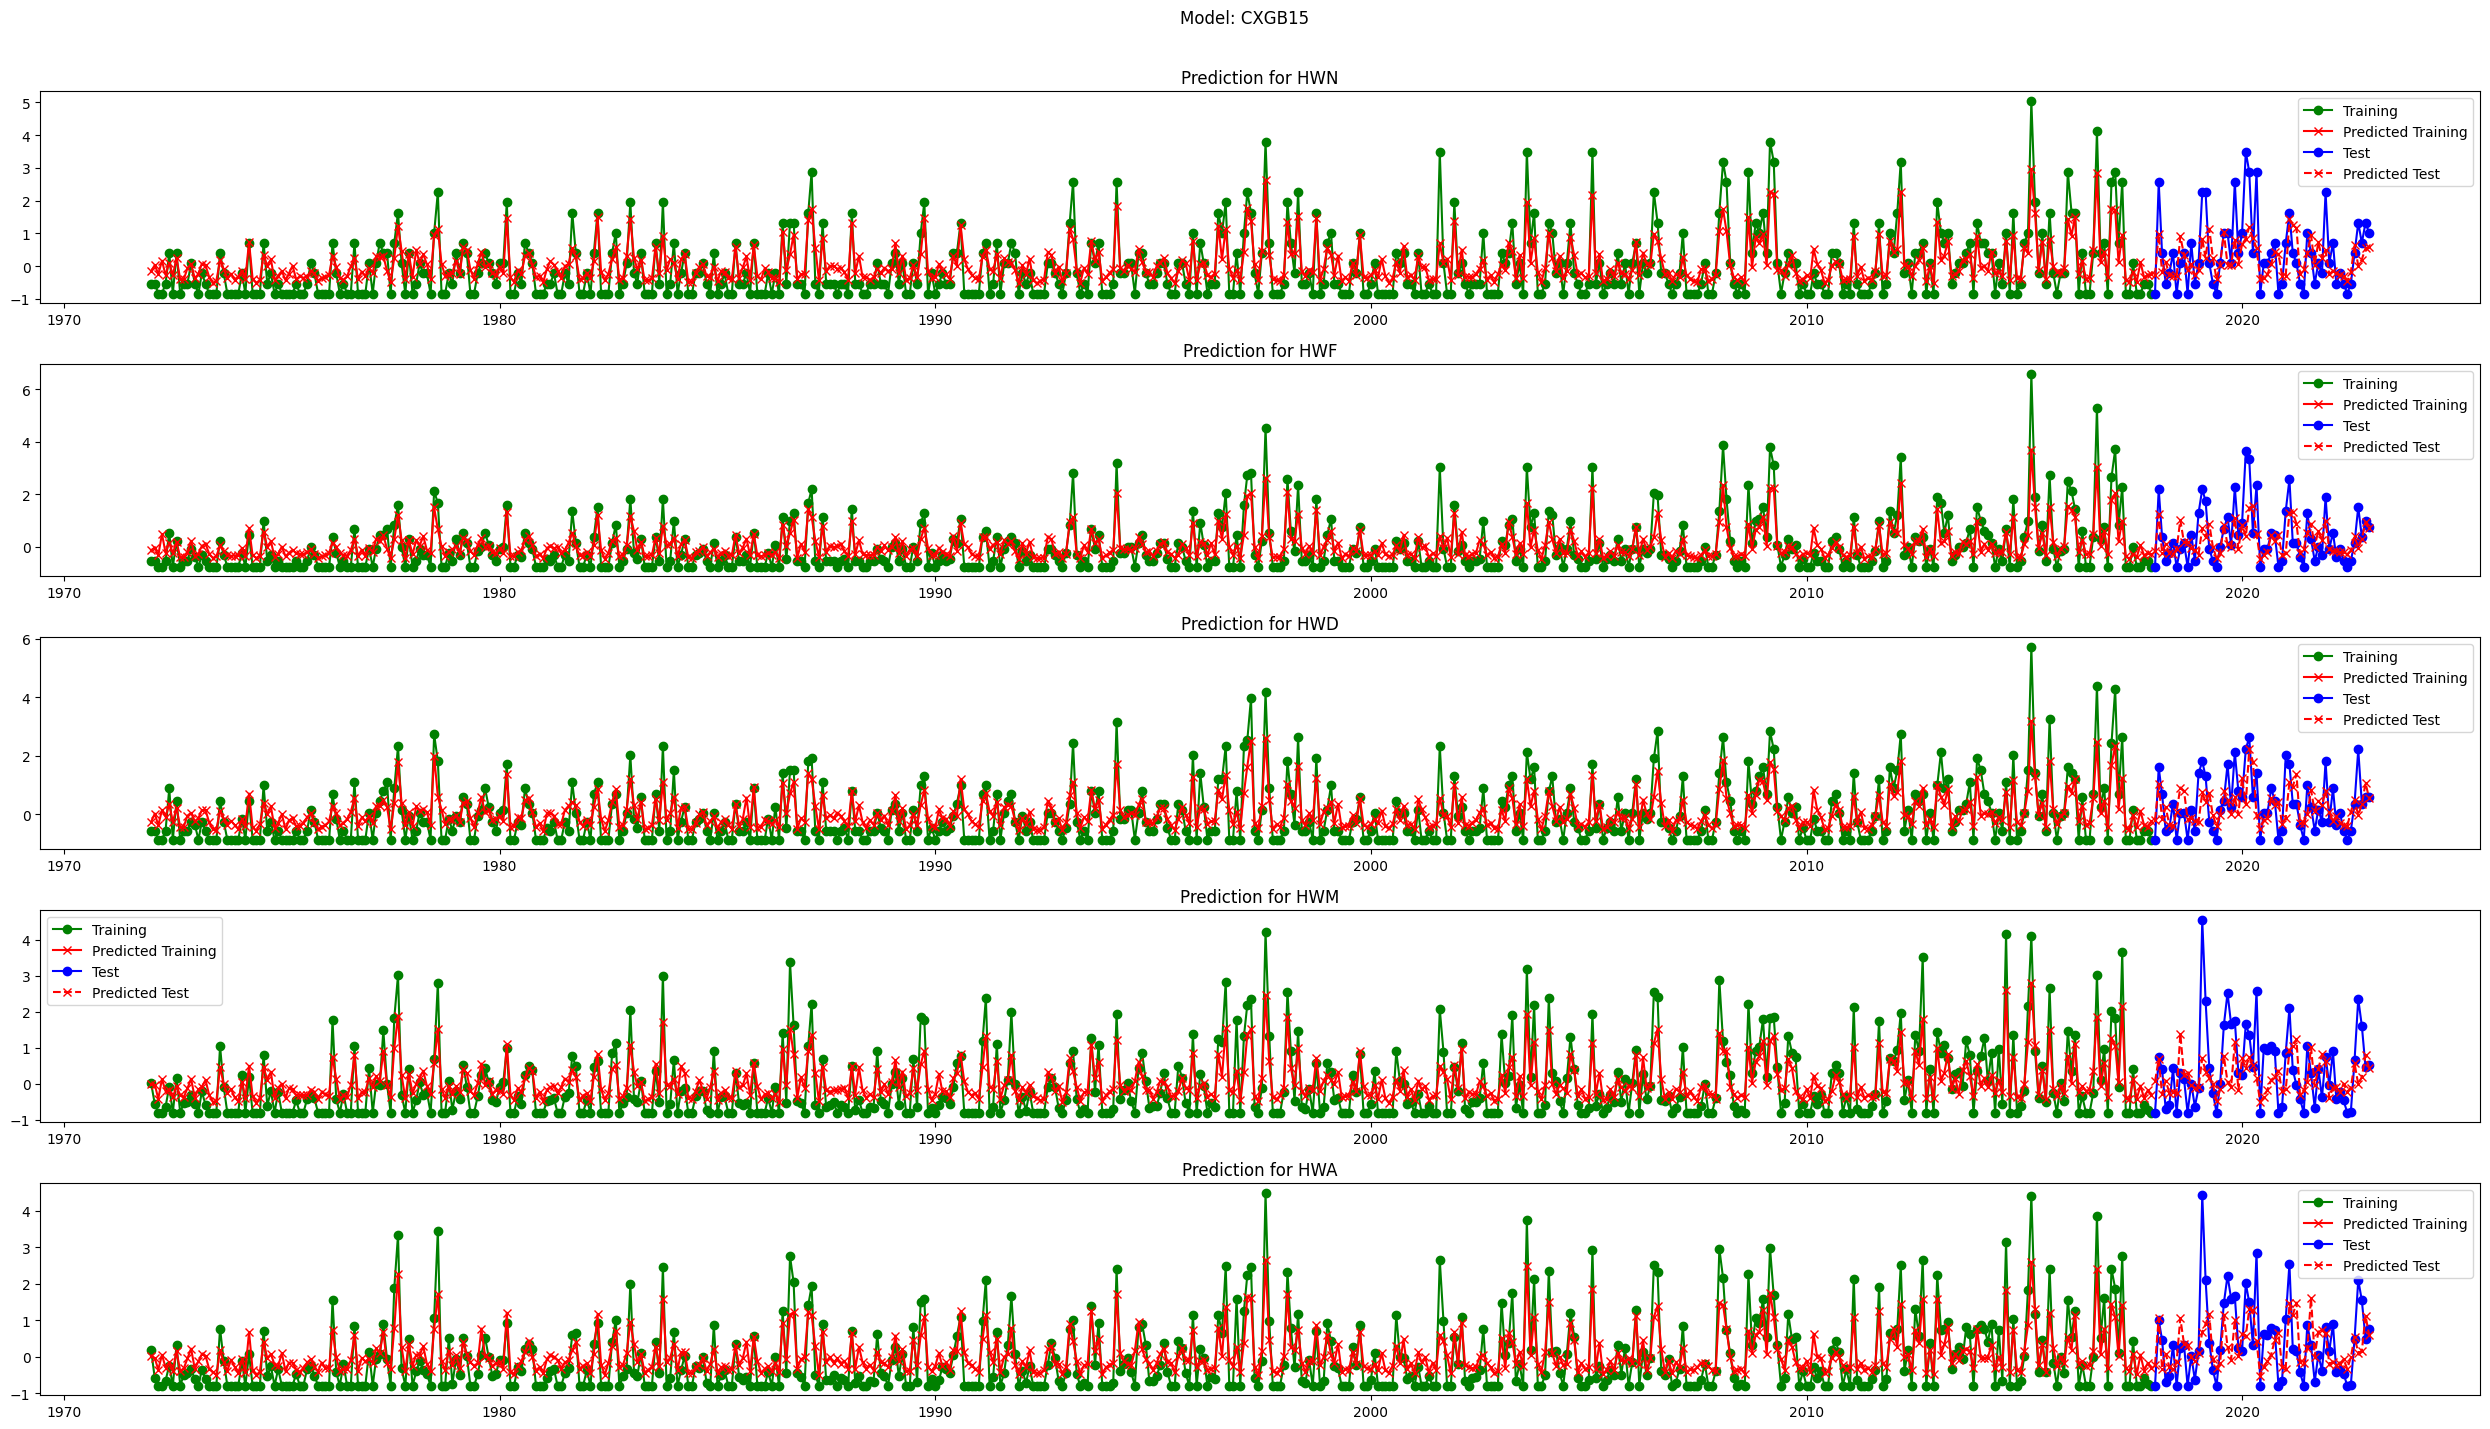

In [22]:
bounds = (-1.1692892810242344, -0.30647585455315646, 3.0, 6.499969486244418)
i_w = 1
id = "ecf2577f"
season = 1
data = pd.read_parquet(f"data/climate_features/{region}/predictor_{id}_year_v2.parquet")
# data = data.drop(columns=["HWF", "HWM", "HWD", "HWA"])
model = XGBCustomObjective(
    objective_func=sera_objective(piecewise_linear_phi_np(bounds, initial_weight=i_w)),
    random_state=42,
    n_estimators=15,
    learning_rate=0.1
)

pred = PredictionModel(data, season, indices_of_interest, model, name_regressor="CXGB15", loss_fn=SERA(bounds=bounds, initial_weight=i_w))
y_train, y_pred_train = pred.train(60)
y_test, y_pred = pred.predict(60)
dates = data.index
pred.plot_predictions(dates, 60, y_train, y_pred_train, y_test, y_pred)

In [23]:
pred.get_metric("mae")

['CXGB15',
 1,
 '-1.1692892810242344|-0.30647585455315646|3.0|6.499969486244418',
 1,
 'mae',
 'prediction',
 0.6937422864351473,
 0.6748857993124671,
 0.6861129049400595,
 0.7796854914626591,
 0.7659839287367184,
 0.7200820821774103]

<Axes: xlabel='Date'>

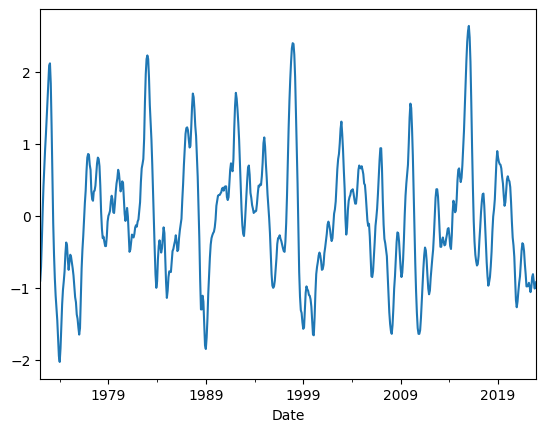

In [25]:
data["ONI-ONI"].plot()